# FIFA 22 Player Analysis
## by Nwani Ugonna Stanley

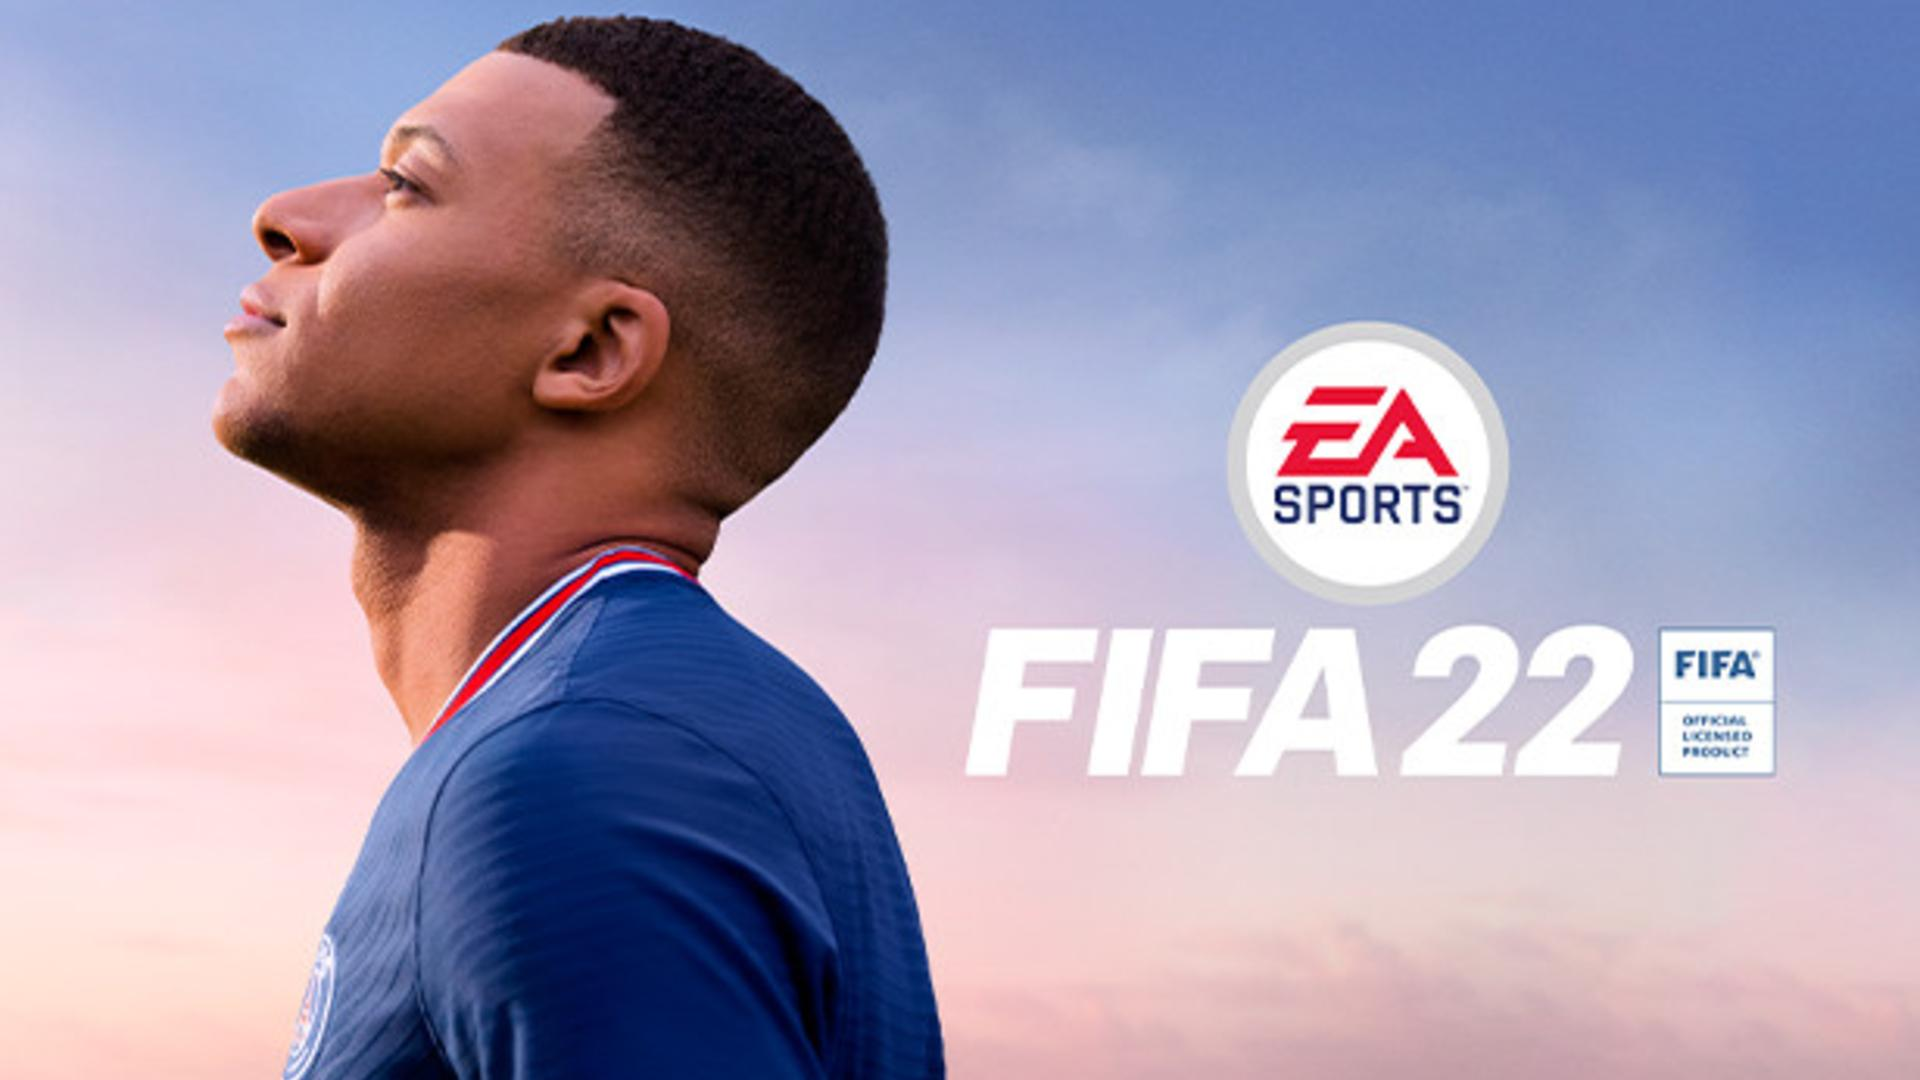

In [1]:
from IPython.display import Image

Image('EA FIFA cover picture.jpg')

## Introduction
This data set used in this project was gotten from [kaggle](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset?select=players_22.csv) and includes player data for the FIFA 22 game. The data set contans 19000+ rows and 110 columns. Each column is a different attribute/rating and reach row is a differrent male footballer.

In [2]:
# import relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# set this to be able to view all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# read in the data
df = pd.read_csv("players_22.csv")

# view first few rows
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0       93         93   78000000.0  320000.0   34  1987-06-24        170   
1       92         92  119500000.0  270000.0   32  1988-08-21        185   
2       91         91   45000000.0  270000.0   36  1985-02-05        187   
3       91         91  129000000.0  270000.0   29  1992-02-05        175   
4       91         91  125500000.0  350000.0   30  1991-06-28        181   

   weight_kg  club_team_id            club_name             league_name  \
0         72          73.0  Paris Saint-Germain          French Ligue 1   
1         81          21.0    FC Bayern München    German 1. Bundesliga   
2         83          11.0    Manchester United  English Premier League   
3         68          73.0  Paris Saint-Germain          French Ligue 1   
4         70          10.0      Manchester City  English Premier League   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   
4           1.0           RCM                17.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0              52        Argentina   
1  2014-07-01                     2023.0              37           Poland   
2  2021-08-27                     2023.0              38         Portugal   
3  2017-08-03                     2025.0              54           Brazil   
4  2015-08-30                     2025.0               7          Belgium   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   
4          1325.0             RCM                   7.0          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   
4          5            4                         4    High/High    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   
4       Yes         232200000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shoote

Since there are so many columns, let's reduce the number of columns to the ones that seem interesting.

In [5]:
# select columns of interest (a lot, lol)

col_interest = ['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_name', 
 'league_name', 'club_position', 'nationality_name', 'preferred_foot', 'release_clause_eur', 'pace', 'shooting',
 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties',
 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes',
 'goalkeeping_speed',]

In [6]:
# create a new dataframe for columns of interest
df1 = df[col_interest]

# view first few rows
df1.head()

short_name  overall  potential    value_eur  wage_eur  age  \
0           L. Messi       93         93   78000000.0  320000.0   34   
1     R. Lewandowski       92         92  119500000.0  270000.0   32   
2  Cristiano Ronaldo       91         91   45000000.0  270000.0   36   
3          Neymar Jr       91         91  129000000.0  270000.0   29   
4       K. De Bruyne       91         91  125500000.0  350000.0   30   

   height_cm  weight_kg            club_name             league_name  \
0        170         72  Paris Saint-Germain          French Ligue 1   
1        185         81    FC Bayern München    German 1. Bundesliga   
2        187         83    Manchester United  English Premier League   
3        175         68  Paris Saint-Germain          French Ligue 1   
4        181         70      Manchester City  English Premier League   

  club_position nationality_name preferred_foot  release_clause_eur  pace  \
0            RW        Argentina           Left         144300000.0  85.0   
1            ST           Poland          Right         197200000.0  78.0   
2            ST         Portugal          Right          83300000.0  87.0   
3            LW           Brazil          Right         238700000.0  91.0   
4           RCM          Belgium          Right         232200000.0  76.0   

   shooting  passing  dribbling  defending  physic  attacking_crossing  \
0      92.0     91.0       95.0       34.0    65.0                  85   
1      92.0     79.0       86.0       44.0    82.0                  71   
2      94.0     80.0       88.0       34.0    75.0                  87   
3      83.0     86.0       94.0       37.0    63.0                  85   
4      86.0     93.0       88.0       64.0    78.0                  94   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       91   
1                   95                          90                       85   
2                   95                          90                       80   
3                   83                          63                       86   
4                   82                          55                       94   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               96           93                 94   
1                 89               85           79                 85   
2                 86               88           81                 84   
3                 86               95           88                 87   
4                 82               88           85                 83   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  91                  96                     91   
1                  70                  88                     77   
2                  77                  88                     85   
3                  81                  95                     93   
4                  93                  91                     76   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     80                91                  94   
1                     79                77                  93   
2                     88                86                  94   
3                     89                96                  89   
4                     76                79                  91   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             72   
1                82                90             85             76   
2                74                94             95             77   
3                84                80             64             81   
4                78                91             63             89   

   power_strength  power_long_shots  mentality_aggression  \
0              69           

## Data Exploration

In [7]:
color = sns.color_palette()[9]

Text(0, 0.5, 'frequency')

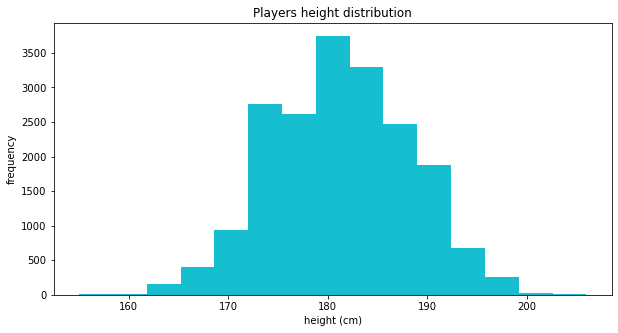

In [8]:
# distribution of height in the dataset
plt.figure(figsize=(10,5))

plt.hist(df1['height_cm'], bins=15, color=color);

plt.title('Players height distribution');
plt.xlabel('height (cm)')
plt.ylabel('frequency')

The histogram shows players are mostly around 170cm to 190cm tall. That's around the 6 feet range which is pretty tall.

Text(0, 0.5, 'frequency')

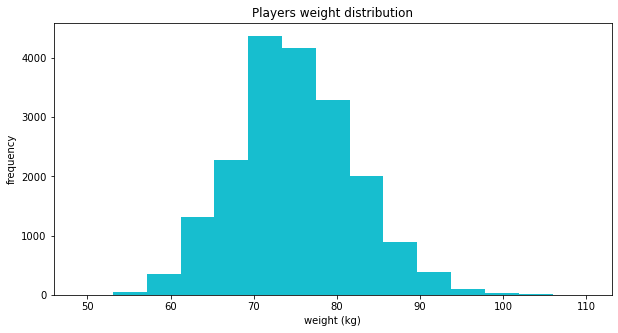

In [9]:
# distribution of weight in the dataset
plt.figure(figsize=(10,5))

plt.hist(df1['weight_kg'], bins=15, color=color);

plt.title('Players weight distribution');
plt.xlabel('weight (kg)')
plt.ylabel('frequency')

This histogram shows that players typically weigh between 65kg to 85kg. Compared to the height distribution, this is a good weight in body mass index perspective. I guess this is expected given that players have to exercise, stay on a diet and all that so they'll be fit to play.

Text(0, 0.5, 'frequency')

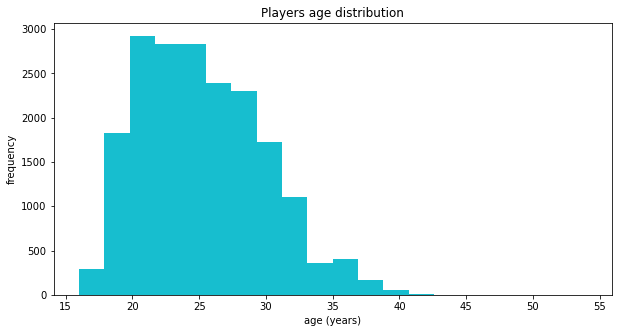

In [10]:
# distribution of age in the dataset
plt.figure(figsize=(10,5))

plt.hist(df1['age'], bins=20, color=color);

plt.title('Players age distribution');
plt.xlabel('age (years)')
plt.ylabel('frequency')

The age histogram distribution is skewed to the right, meaning that the players are generally younger. This is not a surprise because players typically start playing football in their teens and retire around 40.

The players are generally between 20 to 30 years old.

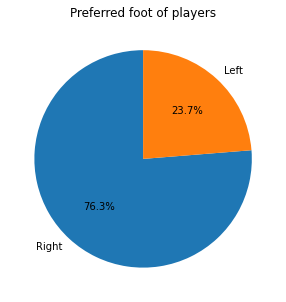

In [11]:
plt.figure(figsize=(10,5))

# convert value to True/False values in order to be visualized by a pie chart 
foot = df1.preferred_foot.value_counts()

# specify labels
labels = ['Right', 'Left']

plt.pie(foot, labels=labels, autopct='%1.1f%%', startangle=90)

# add a title
plt.title('Preferred foot of players')
plt.show() 

This pie chart shows that 76.3% of players' preferred foot is the right foot. This does not mean that they don't use their left foot as well because there are definitely players that can use both feet. 

In [12]:
# create function that easily allows to create count plots 
def top100(col, title, xlabel, ylabel='Number of players'):
    '''
    Create count plots easily from a dataframe.

    Args:
        col: A column in the dataframe.
        title: Title of the plot.
        xlabel: x-axis label.
        ylabel: y-axis label

    Returns:
        Returns a count plot of the selected column.
    '''
    
    plt.figure(figsize=(20,6))

    # create dataframe to be used for the plot
    top100 = df1.iloc[:100, :]

    sns.countplot(x=col, data=top100, color=color);

    # label and title
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.xticks(rotation=90);

    #-------------------------------------------------------------------------------------------------------------------------

    # get the current tick locations and labels
    locs, labels = plt.xticks()

    # add annotations
    cat_counts = top100[col].value_counts()

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        top100_label = cat_counts[label.get_text()]
        pct_string = '{:0.0f}'.format(top100_label)

        # print the annotation just below the top of the bar
        plt.text(loc, top100_label-0.5, pct_string, ha = 'center', color = 'w', weight='bold');


The huge block of code above is a simple function that creates a countplot from the dataframe. The parameters for the function are the column name to be used to create the count plot, the title, the x-axis label and the y-axis label of the plot. 

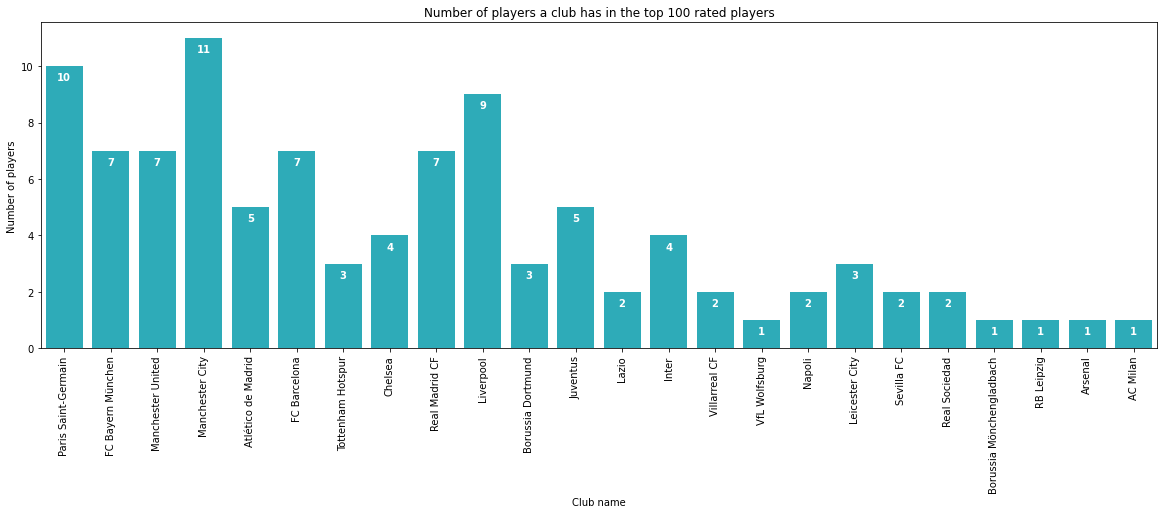

In [13]:
col = 'club_name'
title = 'Number of players a club has in the top 100 rated players'
xlabel = 'Club name'

top100(col=col, title=title, xlabel=xlabel)

This bar plot shows which clubs contain the most players in the top 100 overall rated players.
> We can see that Manchester City has the most players (11) in the top 100. That should be like their starting XI which is ridiculous.
>
> PSG comes second with 10 players and Liverpool, third wit 9 players.

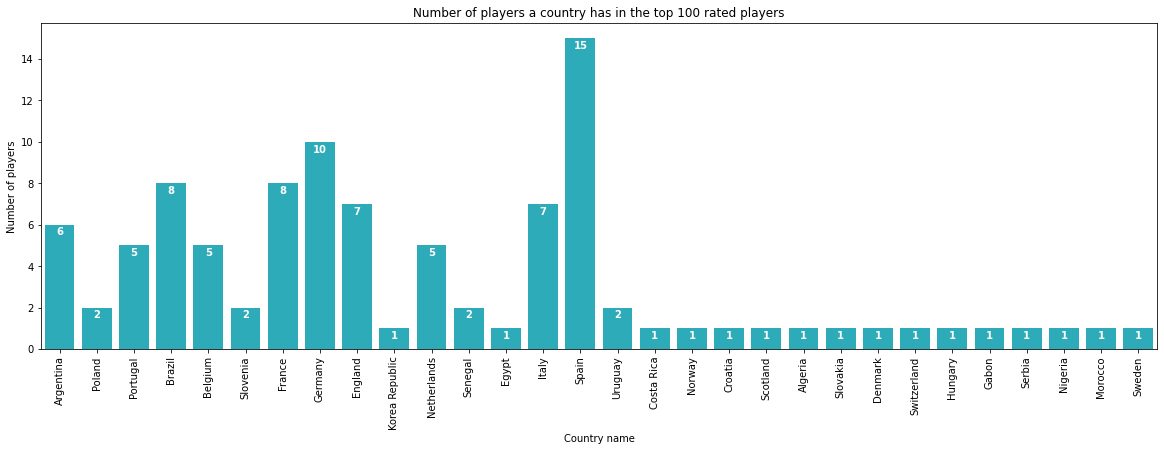

In [14]:
col = 'nationality_name'
title = 'Number of players a country has in the top 100 rated players'
xlabel = 'Country name'

top100(col=col, title=title, xlabel=xlabel)

This bar plot shows which countries contain the most players in the top 100 overall rated players.
> Spain by far has the most players (15) in the top 100 overall rated. Germany is next with 10 players.

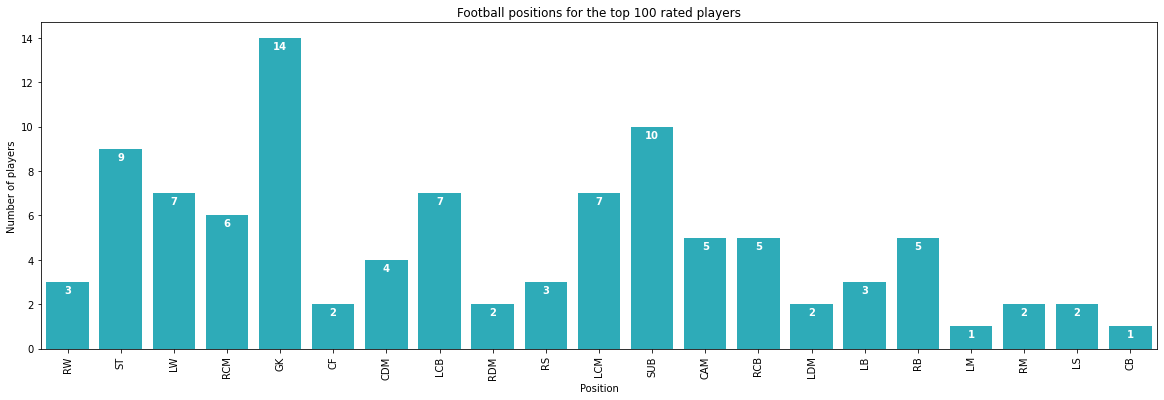

In [15]:
col = 'club_position'
title = 'Football positions for the top 100 rated players'
xlabel = 'Position'

top100(col=col, title=title, xlabel=xlabel)

This bar plot shows which player positions contain the most players in the top 100 overall rated players.
> Surprisingly, for me at least, Goalkeepers are the most common by far in the top 100 overall rated. There are 14 Goalkeepers in the top 100.
>
> The next most common position is actually players that play as substitutes for their clubs (which is also surprising by the way). 10 players made it to the top 100.
>
> The third most common football position is the Striker spot.

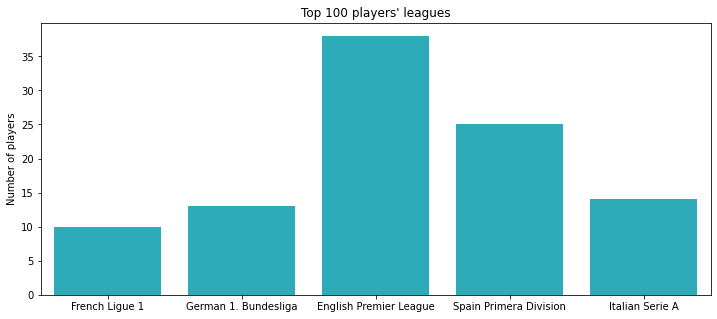

In [16]:
plt.figure(figsize=(12, 5))

# create dataframe to be used for the plot
league100 = df1.iloc[:100, :]

sns.countplot(x='league_name', data=league100, color=color);

# labels and title
plt.title("Top 100 players' leagues");
plt.xlabel('');
plt.ylabel('Number of players');

As we can see in this bar plot, most of the players in the top 100 overall rated play in the English Premier League.

In [17]:
# create function to easily create bar plots
def top10(col, title, xlabel='Player name', ylabel='Rating'):
    '''
    Create bar plots easily from a dataframe.

    Args:
        col: A column in the dataframe.
        title: Title of the plot.
        xlabel: x-axis label. Default is 'Player name'
        ylabel: y-axis label. Default is 'Rating'

    Returns:
        Returns a bar plot of the selected column as the y-axis and the name of the player as the x-axis.
    '''
    
    plt.figure(figsize=(20,6))

    # create dataframe to be used for the plot
    top10 = df1.sort_values(col, ascending=False).head(10)
   
    sns.barplot(x='short_name', y=col, data=top10, color=color)

    # label and title
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);

    #-------------------------------------------------------------------------------------------------------------------------

    # get the current tick locations and labels
    locs, labels = plt.xticks()

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label and use it to filter the dataframe for the overall value
        top10_label = top10[top10['short_name'] == label.get_text()][col]

        # extract the overall value from the overall_label series and format
        top10_label = top10_label.values[0]
        pct_string = '{:0.0f}'.format(top10_label)

        # print the annotation just below the top of the bar
        plt.text(loc, top10_label-4, pct_string, ha = 'center', color = 'w', weight='bold');

The block of code above is a function that creates a bar plot containing the top 10 players with the highest rating in a partiular skill. The function takes parameters similar to the other function; column name that contains ratings for a skill, title of the plot, x-axis label and y-axis label. The axis labels are both optional as they have default parameters assigned to them.

This function can be used to create plots for all the columns that contains rating for a particular skill (there are a lot of them!). I am only going through a few to demonstrate how it works.

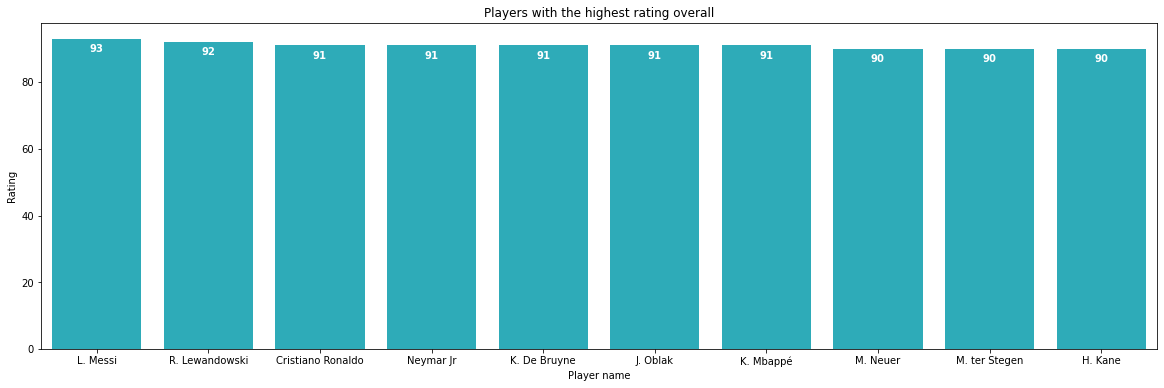

In [18]:
col = 'overall'
title = 'Players with the highest rating overall'

top10(col=col, title=title)

This plot shows the highest rated players in this years FIFA rating. Lionel Messi is top with an overall rating of 93, closely followed by Robert Lewandowski who has an overall rating of 92.

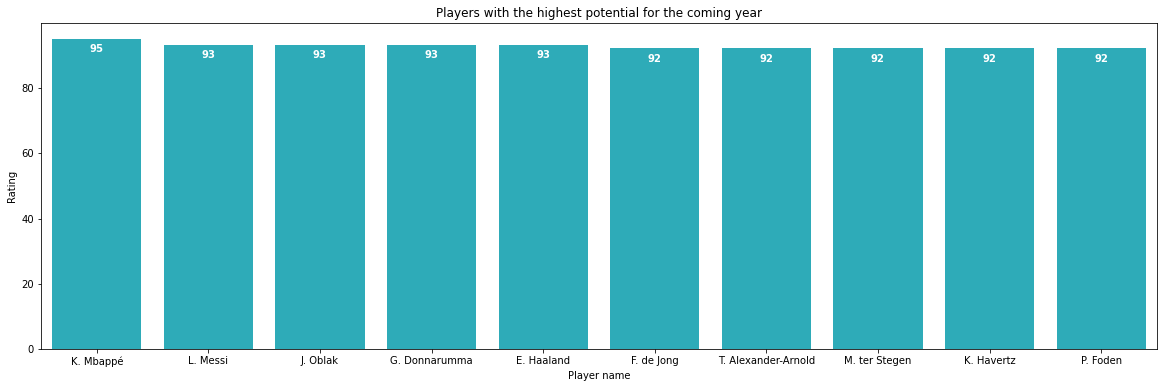

In [19]:
col = 'potential'
title = 'Players with the highest potential for the coming year'

top10(col=col, title=title)

This plot shows players with the highest potential for the coming year. Kylian Mbappe is top with a potential rating of 95, Lionel Messi is second with a rating of 93. 

Looking through this plot, it can be observed that Messi is 10 years older than most of the players here. This makes his high potential rating even more impressive.

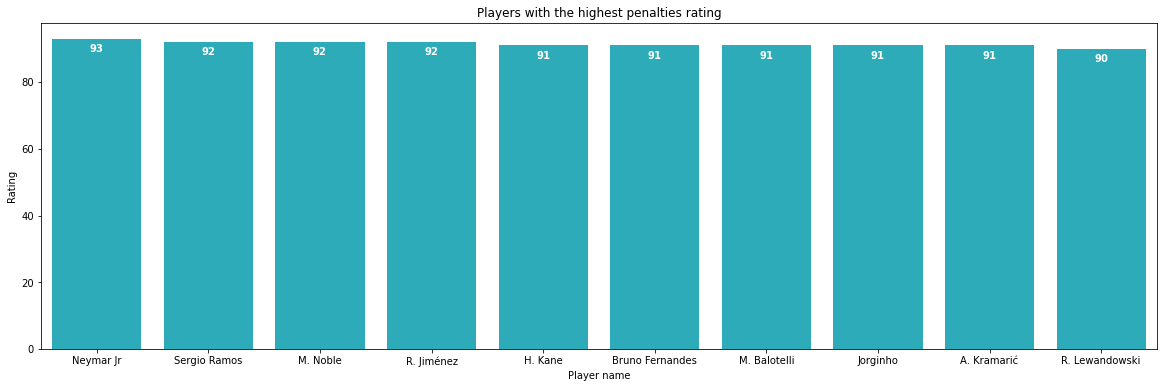

In [20]:
col = 'mentality_penalties'
title = 'Players with the highest penalties rating'

top10(col=col, title=title)

This plot shows players that have the highest penalties rating. Neymar Jr is the player with the highest rating (93). He is closely followed by Sergio Ramos (92), Mark Noble (92) and Raul Jimenez (92).

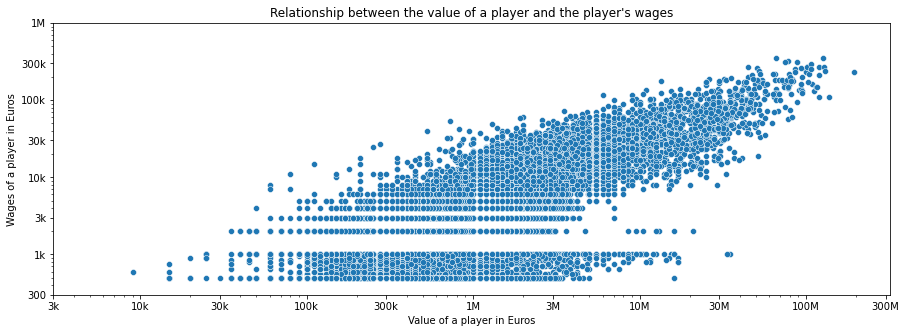

In [21]:
plt.figure(figsize=(15,5))

sns.scatterplot(x='value_eur', y='wage_eur', data=df1);

# plot both axes as a log scale because of the high values.
plt.xscale('log')
plt.yscale('log')
plt.xticks([3e3, 1e4, 3e4, 1e5, 3e5, 1e6, 3e6, 1e7, 3e7, 1e8, 3e8], 
           ['3k', '10k', '30k', '100k', '300k', '1M', '3M', '10M', '30M', '100M', '300M'])
plt.yticks([300, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6], 
           [300, '1k', '3k', '10k', '30k', '100k', '300k', '1M'])

# labels and title
plt.title("Relationship between the value of a player and the player's wages");
plt.xlabel("Value of a player in Euros");
plt.ylabel('Wages of a player in Euros');

This scatter plot shows the positive correlation between the amount in wages a player earns (Euros) and the reported value of a player (Euros).

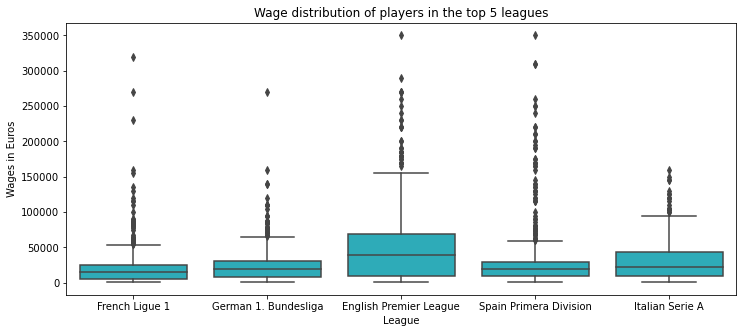

In [22]:
plt.figure(figsize=(12, 5))

# create dataframe to be used for the plot
top5_leagues = ['English Premier League', 'Spain Primera Division', 'French Ligue 1',
                'Italian Serie A', 'German 1. Bundesliga']
top5_leagues_df = df1[df1.league_name.isin(top5_leagues)]

sns.boxplot(x='league_name', y='wage_eur', data=top5_leagues_df, color=color);

# labels and title
plt.title("Wage distribution of players in the top 5 leagues");
plt.xlabel('League');
plt.ylabel('Wages in Euros');

These boxplots shows the wage distribution of players in the top 5 leagues. 
> The English Premier League pays players the highest amount in wages on average. This league also has their players collecting more in wages in general.
>
> The Italian Serie A has the second highest average wage amount, although there are no extreme cases where players collect really high wages as compared to other leagues.

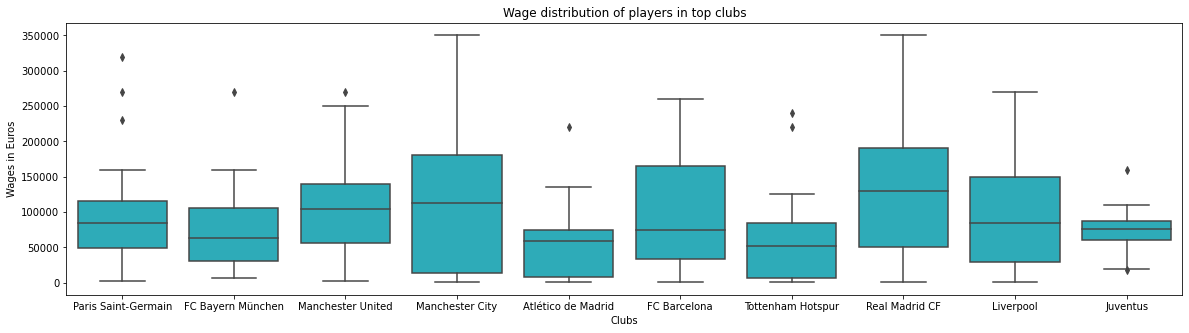

In [23]:
plt.figure(figsize=(20, 5))

# create dataframe to be used for the plot
top_clubs = ['Paris Saint-Germain', 'FC Bayern München', 'Manchester United', 'Manchester City', 'Real Madrid CF',
             'FC Barcelona', 'Liverpool', 'Juventus', 'Tottenham Hotspur', 'Atlético de Madrid']
top_clubs_df = df1[df1.club_name.isin(top_clubs)]

sns.boxplot(x='club_name', y='wage_eur', data=top_clubs_df, color=color);

# labels and title
plt.title("Wage distribution of players in top clubs");
plt.xlabel('Clubs');
plt.ylabel('Wages in Euros');

These boxplots show the wage distribution of players in top clubs.
> Real Madrid on average, pays the highes amount in wages compared to other clubs. They are closely followed by Manchester City.

### Fun facts

* Kevin DeBruyne from Manchester City and Karim Benzema from Real Madrid are the highest earning players. They both earn 350000 euros in wages.


* Kylian Mbappe from Paris Saint-Germain is the most valued player, valued at 194,000,000 euros. Erling Haaland from Borussia Dortmund is the second most valuable player, valued at 137,500,000 euros.

-------------------------------------------------------------------------------------------------------------------------------

## Machine Learning - KMeans Clustering

In this section, I want to implement KMeans clustering to the dataset to see if it can identify positions that players play. 

KMeans clustering is a machine learning algorithm that looks for patterns in the data. Like I said earlier, I want to see if the KMeans clustering algorithm can detect that there are different positions players play in